In [1]:
import seaborn as sns
from runco import config, sc
import datetime
import matplotlib.pyplot as plt
import numpy

sns.set_context('notebook')
sns.set_style('whitegrid')
%matplotlib notebook

In [2]:
conf = config.Config()

In [3]:
slowcon = sc.ConfiguredSlowControls(conf.data['slowcontrols'])
ch = slowcon.channel_id_by_name['uB_Cryo_IFIX_1_0/PT102']

In [4]:
now = datetime.datetime.now()
one_week_ago = now - datetime.timedelta(days=14)

In [5]:
form = lambda x : x.strftime("%Y-%m-%d %H:%M:%S")

In [6]:
slowcon.query_timebinned_data(ch,1, form(one_week_ago), form(now))
result = slowcon.cur.fetchall()

In [7]:
x = [datetime.datetime.fromtimestamp(i[1])-datetime.timedelta(hours=6) for i in result]
y = [i[2] for i in result]

<IPython.core.display.Javascript object>


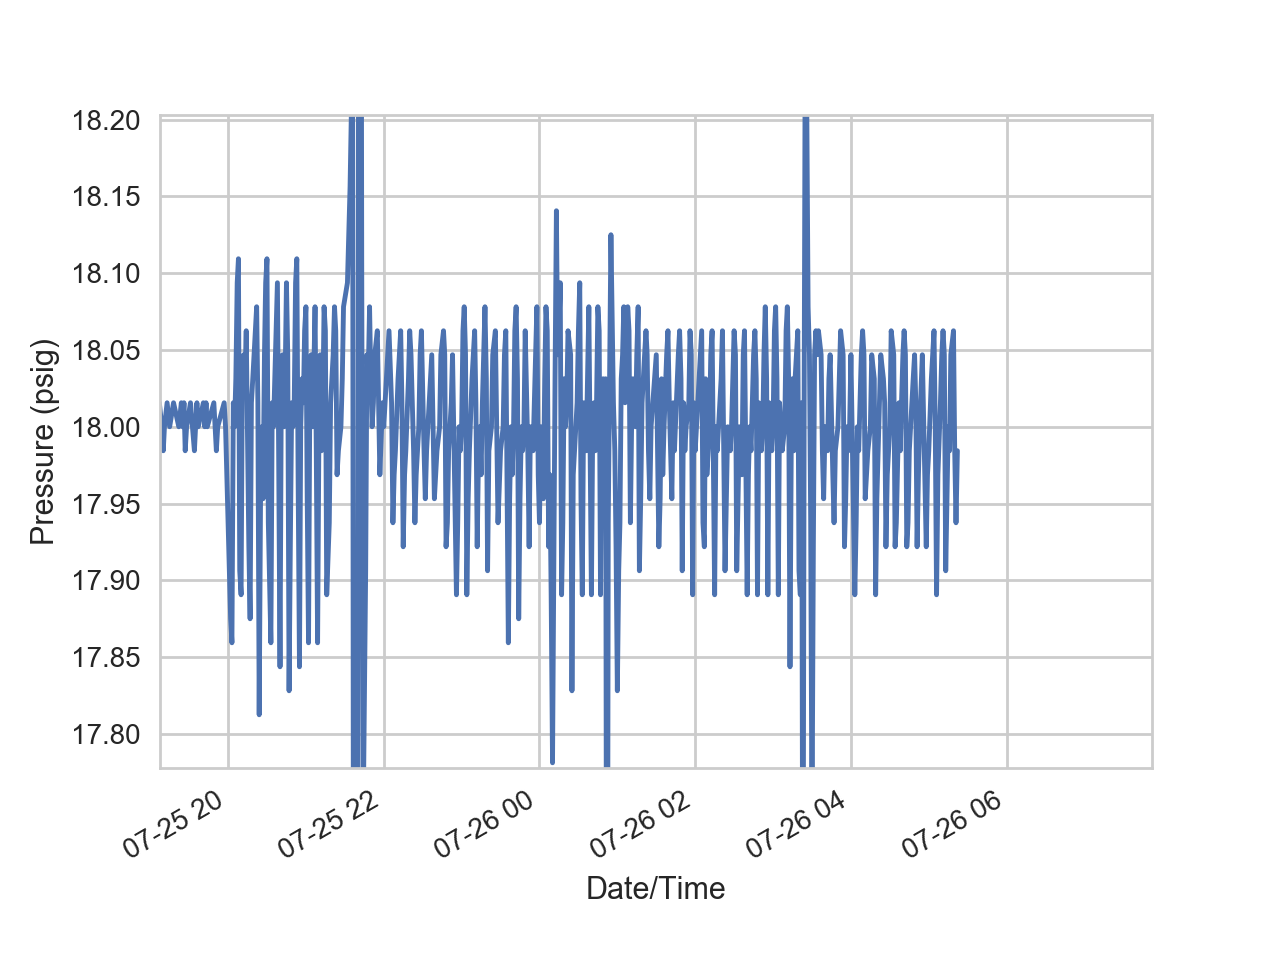

In [8]:
ax = plt.figure()
plt.plot(x,y)
plt.xlabel('Date/Time')
plt.ylabel('Pressure (psig)')
ax.autofmt_xdate()

<IPython.core.display.Javascript object>


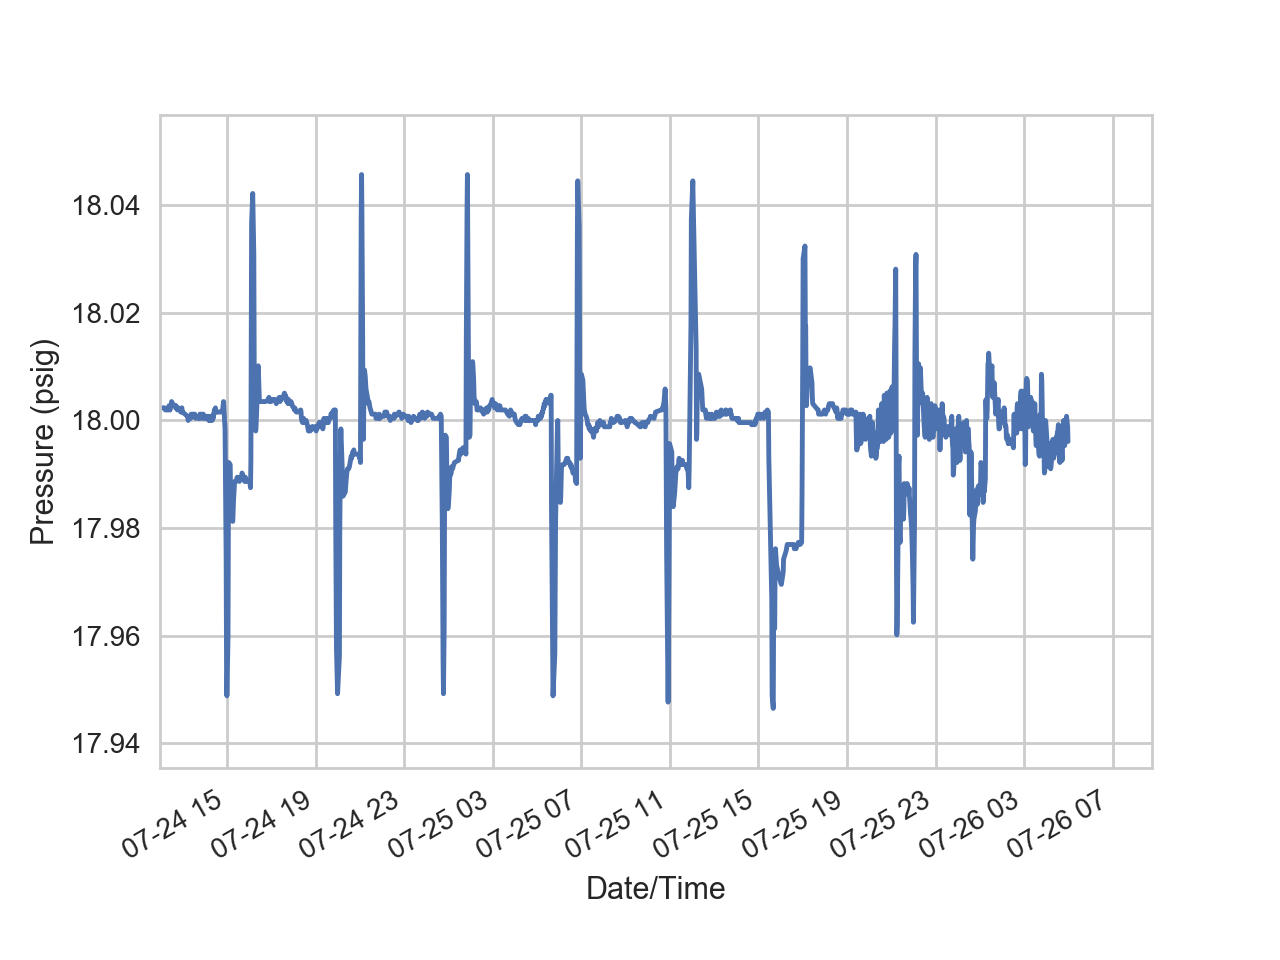

In [9]:
ax = plt.figure()
x_0=[]
y_0=[]
window=20

for index, value in enumerate(zip(x,y)) :
    if index <window or index >= len(x)-window:
        continue
    x_0.append(value[0])
    y_0.append(numpy.average(y[index-window:index+window]))

plt.plot(x_0, y_0)
plt.xlabel('Date/Time')
plt.ylabel('Pressure (psig)')
ax.autofmt_xdate()

In [10]:
class TrapFilter(object):
    def __init__(self, length, gap, threshold):
        self.length = length
        self.gap = gap
        self.threshold = threshold
        self.triggers = []
    
    def filter(self, input_array):
        for index, value in enumerate(input_array[:len(input_array)-2*self.length-self.gap]):
            first_window=sum(input_array[index:index+self.length])
            second_window = sum(input_array[index+self.length+self.gap:index+2*self.length+self.gap])
            filtered_value = first_window-second_window
            if filtered_value>self.threshold:
                self.triggers.append((index, filtered_value))
        
    

In [11]:
filt = TrapFilter(20,19, 0.9)
danger = TrapFilter(20,19, 0.4)

In [12]:
filt.filter(y)
danger.filter(y)

<IPython.core.display.Javascript object>


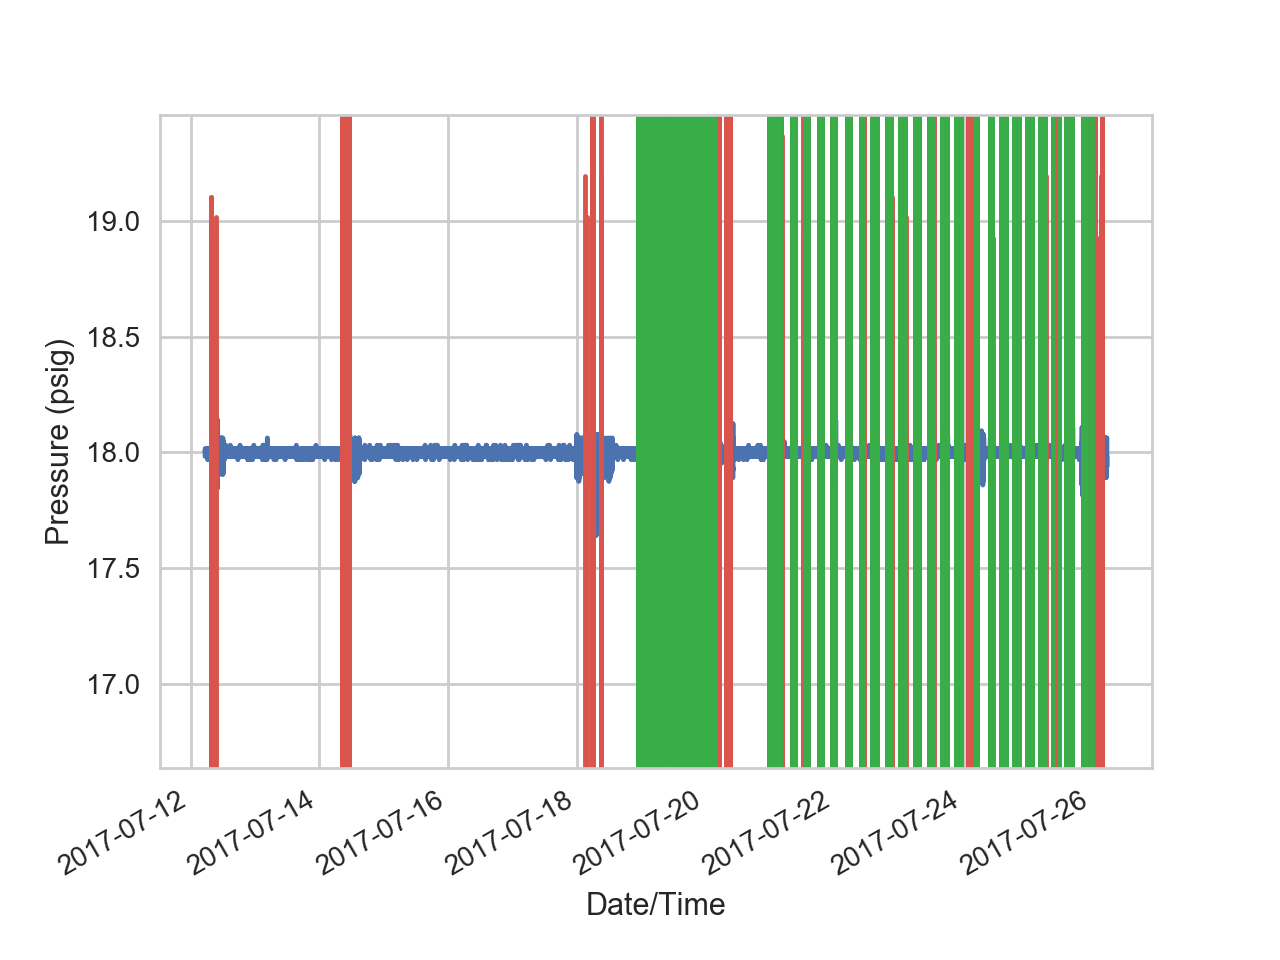

In [13]:
ax = plt.figure()
plt.plot(x,y)
for i in danger.triggers:
    plt.axvline(x=x[i[0]],
                ymin=0.0,
                ymax=i[1]*2, color=sns.xkcd_rgb["pale red"])

for i in filt.triggers:
    plt.axvline(x=x[i[0]], 
                ymin=0.0,
                ymax=i[1]*2, color=sns.xkcd_rgb["medium green"])


plt.xlabel('Date/Time')
plt.ylabel('Pressure (psig)')
ax.autofmt_xdate()

<IPython.core.display.Javascript object>


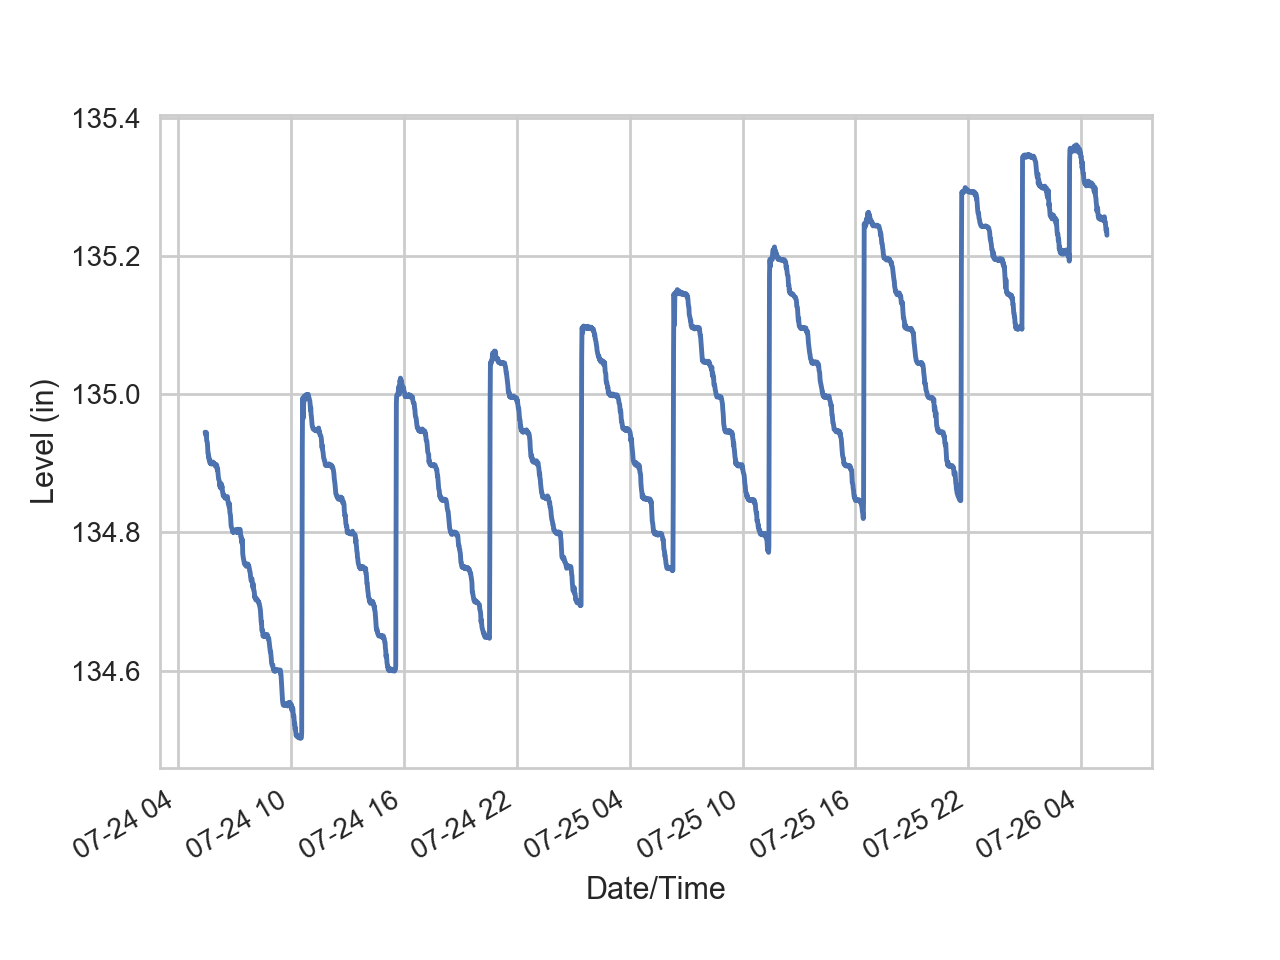

In [14]:
slowcon = sc.ConfiguredSlowControls(conf.data['slowcontrols'])
ch = slowcon.channel_id_by_name['uB_Cryo_IFIX_1_0/LT122_Ar']
now = datetime.datetime.now()
one_week_ago = now - datetime.timedelta(days=2)
slowcon.query_timebinned_data(ch,1, form(one_week_ago), form(now))
result = slowcon.cur.fetchall()
x = [datetime.datetime.fromtimestamp(i[1])-datetime.timedelta(hours=6) for i in result]
y = [i[2] for i in result]
ax = plt.figure()
plt.plot(x,y)
plt.xlabel('Date/Time')
plt.ylabel('Level (in)')
ax.autofmt_xdate()